In [1]:
import pandas as pd
from empath import Empath
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fahad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load your dataset
file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/reddit/Data/reddit_processed.csv'
df = pd.read_csv(file_path)

In [8]:
# Assuming 'thread_text_processed' is the column with text data
text_data = df['thread_text_processed'].dropna()

In [ ]:
# Initialize Empath
lexicon = Empath()

# Function to analyze categories
def analyze_categories(text):
    return lexicon.analyze(text, normalize=True)

# Apply Empath analysis
category_results = text_data.apply(analyze_categories)

# Convert results to DataFrame for easier manipulation
category_df = pd.DataFrame(category_results.tolist())
category_df

In [10]:
# Top Words Analysis
def get_top_words(texts, num_top_words=100):
    stop_words = set(stopwords.words('english'))
    words = []
    for text in texts:
        words.extend(word for word in text.lower().split() if word not in stop_words and word.isalpha())

    word_counts = Counter(words)
    return word_counts.most_common(num_top_words)

top_words = get_top_words(text_data)
top_words


[('would', 213268),
 ('people', 176617),
 ('like', 176415),
 ('one', 160006),
 ('get', 134038),
 ('privacy', 119466),
 ('im', 118361),
 ('time', 104327),
 ('could', 97043),
 ('know', 94182),
 ('even', 90941),
 ('think', 90802),
 ('us', 88047),
 ('really', 78391),
 ('also', 74197),
 ('back', 73986),
 ('see', 73701),
 ('go', 72955),
 ('got', 69513),
 ('way', 66102),
 ('make', 64931),
 ('want', 64759),
 ('going', 64304),
 ('something', 64086),
 ('much', 63651),
 ('right', 62441),
 ('brother', 62050),
 ('big', 61823),
 ('still', 60745),
 ('never', 60728),
 ('use', 59029),
 ('well', 58198),
 ('good', 57496),
 ('things', 56091),
 ('security', 55544),
 ('work', 53231),
 ('said', 52837),
 ('someone', 52697),
 ('day', 52204),
 ('thing', 51965),
 ('around', 51822),
 ('years', 50731),
 ('say', 50382),
 ('cannot', 49189),
 ('every', 47984),
 ('take', 46858),
 ('government', 45985),
 ('need', 45755),
 ('public', 44832),
 ('first', 43834),
 ('house', 43686),
 ('cameras', 43623),
 ('anything', 43268)

In [ ]:
# Identifying Unique Words
def get_unique_words(texts):
    word_freq = Counter()
    for text in texts:
        word_freq.update(set(text.lower().split()))

    # Filter words that appear only once across the dataset
    unique_words = {word for word, count in word_freq.items() if count == 1}
    return unique_words

unique_words = get_unique_words(text_data)

# Output results
print("Top words:", top_words)
print("Unique words:", unique_words)

In [7]:
top_words

[('would', 213268),
 ('people', 176617),
 ('like', 176415),
 ('one', 160006),
 ('get', 134038),
 ('privacy', 119466),
 ('im', 118361),
 ('time', 104327),
 ('could', 97043),
 ('know', 94182),
 ('even', 90941),
 ('think', 90802),
 ('us', 88047),
 ('really', 78391),
 ('also', 74197),
 ('back', 73986),
 ('see', 73701),
 ('go', 72955),
 ('got', 69513),
 ('way', 66102)]

In [13]:
unique_words

{'turktrustcertificateservicesproviderrootpem',
 'nonmegacorpboardmembers',
 'tobegirfriends',
 'videoscreens',
 'originallyspecified',
 'plaintively',
 'manyfaceted',
 'julyaugust',
 'orivacy',
 'nongeorgians',
 'thatdumblerdo',
 'showoffy',
 'processextraction',
 'bankrobber',
 'matteo',
 'springbed',
 'singleunit',
 'omeara',
 'sometimesand',
 'casuallike',
 'shocknews',
 'pshop',
 'aftersun',
 'municipallythemed',
 'semisacred',
 'regionalbased',
 'browaer',
 'alc',
 'didntstop',
 'mindcrazy',
 'happygirls',
 'itwise',
 'slendermen',
 'deployif',
 'helpmore',
 'unusualwent',
 'aragorns',
 'misrables',
 'manandwoman',
 'weekthen',
 'coolect',
 'basemet',
 'punto',
 'adsif',
 'neuralmatch',
 'nolife',
 'freedomain',
 'craterlike',
 'sedimentary',
 'simplycoloredbutstartlinglydesigned',
 'spriggig',
 'noncompressed',
 'blading',
 'ahhhhhhlol',
 'sixflags',
 'cocksucks',
 'taloogey',
 'madeas',
 'sepolicy',
 'gascollecting',
 'diewalks',
 'teleperformance',
 'mondragn',
 'maplesugar',


In [5]:
category_df

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,0.0,0.003861,0.011583,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.007722,0.0,0.003861,0.007722
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.009901,...,0.00000,0.004950,0.0,0.0,0.004950,0.0,0.014851,0.0,0.000000,0.004950
2,0.0,0.002262,0.004525,0.009050,0.002262,0.002262,0.00000,0.002262,0.000000,0.000000,...,0.00000,0.006787,0.0,0.0,0.009050,0.0,0.002262,0.0,0.000000,0.002262
3,0.0,0.000000,0.000000,0.000000,0.000000,0.006623,0.00000,0.000000,0.000000,0.013245,...,0.00000,0.000000,0.0,0.0,0.013245,0.0,0.006623,0.0,0.006623,0.019868
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583766,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
583767,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
583768,0.0,0.016949,0.011299,0.011299,0.000000,0.016949,0.00565,0.000000,0.022599,0.000000,...,0.00565,0.000000,0.0,0.0,0.000000,0.0,0.005650,0.0,0.000000,0.000000
583769,0.0,0.014184,0.007092,0.014184,0.000000,0.014184,0.00000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.0,0.007092,0.0,0.000000,0.0,0.014184,0.007092


In [11]:
category_df.to_csv('C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/reddit/Data/reddit_empath.csv', index=False)

In [2]:
# Load your dataset
file_path = 'C:/Users/fahad/OneDrive - Oulun yliopisto/Documents/reddit/Data/reddit_empath.csv'
df = pd.read_csv(file_path)

C:\Users\fahad\AppData\Local\Temp\ipykernel_12800\4247482607.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_d")


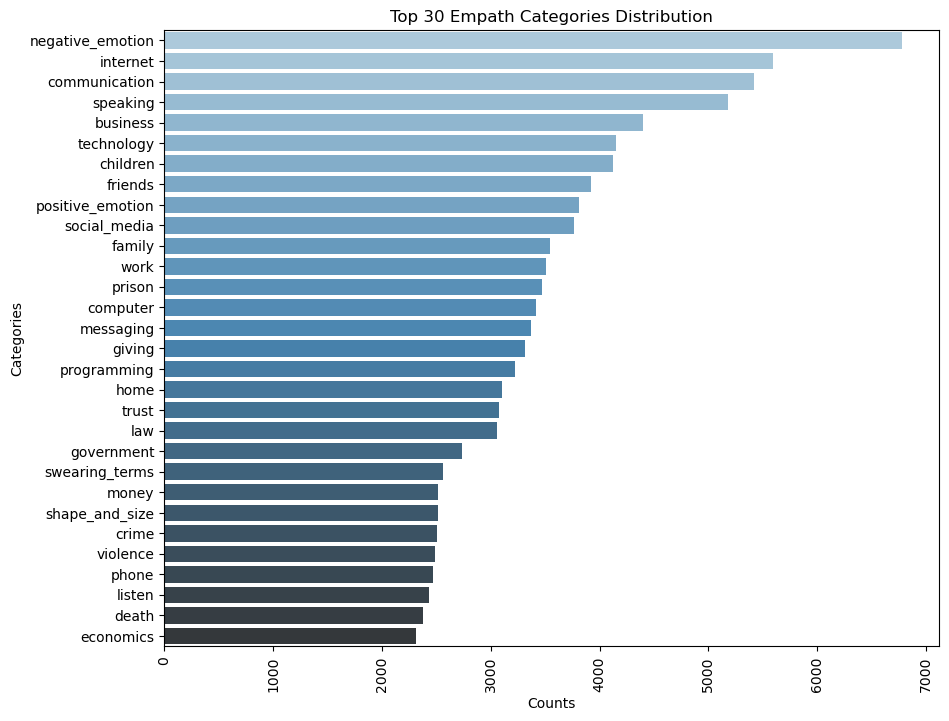

In [6]:
category_sums = df.sum().sort_values(ascending=False)

# Select the top 30 categories
top_categories = category_sums.head(30)

# Increase the size of the plot
plt.figure(figsize=(10, 8))

# Plotting with rotated labels
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Blues_d")
plt.title('Top 30 Empath Categories Distribution')
plt.xlabel('Counts')
plt.ylabel('Categories')
plt.xticks(rotation=90)  # Rotates X-axis labels to be horizontal

plt.show()
